In [289]:
import numpy as np
import pandas as pd
import sklearn.datasets as sd
import sklearn.model_selection as sms
import matplotlib.pyplot as plt
import random

In [261]:
# 读取实验数据
X, y = sd.load_svmlight_file('housing_scale.txt',n_features = 13)

In [262]:
# 将数据集切分为训练集和验证集
X_train, X_valid, y_train, y_valid = sms.train_test_split(X, y)

In [263]:
# 将稀疏矩阵转为ndarray类型
X_train = X_train.toarray()
X_valid = X_valid.toarray()
y_train = y_train.reshape(len(y_train),1)
y_valid = y_valid.reshape(len(y_valid),1)

In [264]:
X_train.shape, X_valid.shape, y_train.shape, y_valid.shape

((379, 13), (127, 13), (379, 1), (127, 1))

In [265]:
# 线性模型参数初始化，可以考虑全零初始化，随机初始化或者正态分布初始化。
theta = np.zeros((14, 1))

In [266]:
# 选取一个Loss函数，计算训练集的Loss函数值，记为loss
def compute_loss(X, y, theta):
    hx = X.dot(theta)
    error = np.power((hx - y), 2).mean() / 2
#     reg = np.power(theta[1:theta.shape[0]],2).mean()
    return error

In [267]:
X_train = np.concatenate((np.ones((X_train.shape[0],1)), X_train), axis = 1)
X_valid = np.concatenate((np.ones((X_valid.shape[0],1)), X_valid), axis = 1)

In [268]:
X_train.shape, X_valid.shape

((379, 14), (127, 14))

In [269]:
loss = compute_loss(X_train, y_train, theta)
loss

291.42604221635884

In [270]:
# 闭式解函数
def normal_equation(X, y):
    return (np.linalg.inv(X.T.dot(X))).dot(X.T).dot(y)

In [271]:
theta = normal_equation(X_train, y_train)
theta

array([[ 10.67521361],
       [ -4.35266767],
       [  2.30464958],
       [ -0.04596842],
       [  1.73332473],
       [ -4.26130639],
       [  8.18557508],
       [  0.87098733],
       [ -8.26877419],
       [  3.40273532],
       [ -2.74208263],
       [ -4.55541174],
       [  2.16021612],
       [-11.65554071]])

In [272]:
loss_train = compute_loss(X_train, y_train, theta)
loss_train

10.619203802989858

In [273]:
loss_valid = compute_loss(X_valid, y_valid, theta)
loss_valid

12.74682419002567

In [274]:
def gradient(X, y, theta):
    return X.T.dot(X.dot(theta) - y)

In [275]:
def descent(X, y, theta, alpha, iters, X_valid, y_valid):
    m = y.size
    loss_train = np.zeros((iters,1))
    loss_valid = np.zeros((iters,1))
    for i in range(iters):
        grad = gradient(X, y, theta)
        theta = theta - alpha * grad
        loss_train[i] = compute_loss(X, y, theta)
        loss_valid[i] = compute_loss(X_valid, y_valid, theta)
    return theta, loss_train, loss_valid

In [307]:
theta = np.zeros((14,1))
alpha = 0.0001
iters = 500
opt_theta, loss_train, loss_valid = descent(X_train, y_train, theta, alpha, iters, X_valid, y_valid)
loss_train.min(), loss_valid.min()

(11.073616618342303, 13.429493577457897)

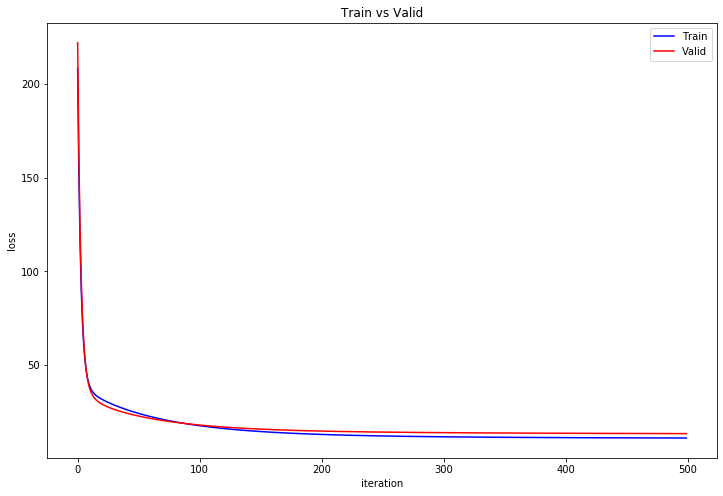

In [311]:
iteration = np.arange(0, iters, step = 1)
fig, ax = plt.subplots(figsize = (12,8))
ax.set_title('Train vs Valid')
ax.set_xlabel('iteration')
ax.set_ylabel('loss')
plt.plot(iteration, loss_train, 'b', label='Train')
plt.plot(iteration, loss_valid, 'r', label='Valid')
plt.legend()
plt.show()

In [278]:
# 这是随机梯度下降的梯度函数
def stochastic_gradient(X, y, theta):
    return X.T.dot(X.dot(theta) - y)

In [296]:
# 随机梯度下降的执行函数 batch_size = 1
def stochastic_descent(X, y, theta, alpha, iters, X_valid, y_valid):
    loss_train = np.zeros((iters,1))
    loss_valid = np.zeros((iters,1))
    for i in range(iters):
        X_sample = np.matrix(random.sample(X.tolist(), 1))
        y_sample = np.matrix(random.sample(y.tolist(), 1))
        grad = gradient(X_sample, y_sample, theta)
        theta = theta - alpha * grad
        loss_train[i] = compute_loss(X, y, theta)
        loss_valid[i] = compute_loss(X_valid, y_valid, theta)
    return theta, loss_train, loss_valid

In [313]:
theta = np.zeros((14,1))
alpha = 0.0001
iters = 10000
opt_theta, sgd_loss_train, sgd_loss_valid = stochastic_descent(X_train, y_train, theta, alpha, iters, X_valid, y_valid)
sgd_loss_train.min(), sgd_loss_valid.min()

(46.25055360660081, 45.748318846725184)

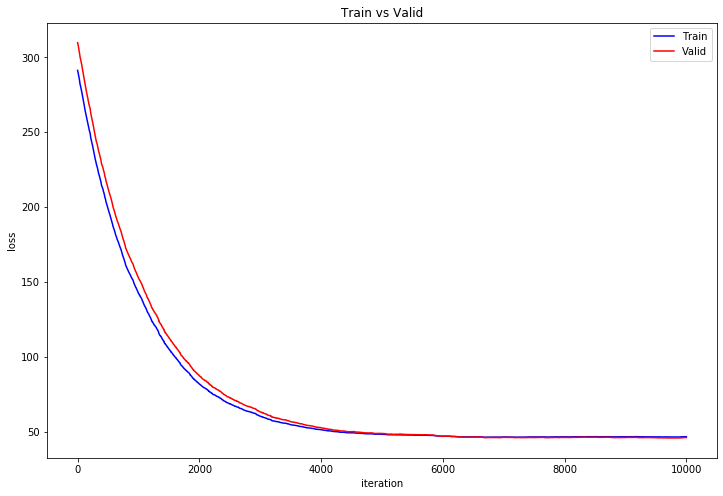

In [314]:
iteration = np.arange(0, iters, step = 1)
fig, ax = plt.subplots(figsize = (12,8))
ax.set_title('Train vs Valid')
ax.set_xlabel('iteration')
ax.set_ylabel('loss')
plt.plot(iteration, sgd_loss_train,'b', label='Train')
plt.plot(iteration, sgd_loss_valid,'r', label='Valid')
plt.legend()
plt.show()